In [8]:
import json
import pandas as pd

In [9]:
# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out2/configs.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    values = row_data[0] + list ( row_data[1].values() ) + list( row_data[2].values() )
    rows.append(values)

# # Step 3: Create a DataFrame
configs = pd.DataFrame(rows, columns=['i', 'j', 'k']+list ( row_data[1].keys() ) + list( row_data[2].keys() ))


In [10]:
configs.head()

,i,j,k,Conv__MaxPooling1D,Conv__NumberBlocks,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
0,0,0,0,6,2,1,4,3,2,0.001567,...,32,64,8,128,2,0.007461,16,0.155113,0.000195,False
1,0,0,1,5,2,2,4,1,1,0.004217,...,128,8,32,8,1,0.024349,32,0.003902,0.000273,False
2,0,0,2,4,1,2,16,8,3,0.235325,...,8,64,64,32,4,0.003502,128,0.141180,0.000849,False
3,1,0,0,5,3,4,8,5,4,0.005355,...,64,128,32,64,2,0.022049,32,0.076569,0.001828,False
4,1,0,1,1,1,2,4,5,3,0.245313,...,8,256,8,128,1,0.025452,256,0.003764,0.000183,False


In [11]:
configs.shape

(56, 21)

---

In [12]:
import pandas as pd
import json

# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out2/results.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    
    if row_data[3] != None:
        values = row_data[0] + [round(row_data[1],2)] + \
                                list(row_data[2].values()) + \
                                 [row_data[3]['loss']] + \
                                row_data[3]['info']['test accuracy'] + \
                                row_data[3]['info']['validation accuracy'] +\
                                 row_data[3]['info']['train accuracy'] 
    # except TypeError or SyntaxError:
    #     pass
        rows.append(values)

# # Step 3: Create a DataFrame
# try:
loss_list = ['loss','gravity_loss', 'c_o_ratio_loss', 'metallicity_loss', 'temperature_loss', 'gravity_mae', 'c_o_ratio_mae', 'metallicity_mae', 'temperature_mae']


results = pd.DataFrame(rows, columns=['i', 'j', 'k', 'iteration']+
                                       list(row_data[2].keys())+['loss']+
                                       ['test_'+elem for elem in loss_list]+
                                       ['val_'+elem for elem in loss_list]+
                                       ['train_'+elem for elem in loss_list])

In [13]:
results.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,val_temperature_mae,train_loss,train_gravity_loss,train_c_o_ratio_loss,train_metallicity_loss,train_temperature_loss,train_gravity_mae,train_c_o_ratio_mae,train_metallicity_mae,train_temperature_mae


In [14]:
results.shape

(0, 35)

In [36]:
# results.iloc[0]

In [37]:

# Concatenate DataFrames based on the first column (ID)
merged_df = pd.merge(results, configs, on=['i','j','k'])

# Print the concatenated DataFrame
merged_df.sort_values(by='loss', inplace=True)


In [38]:
merged_df.head()

,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,test_c_o_ratio_loss,test_metallicity_loss,test_temperature_loss,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick


In [39]:
merged_df.sort_values(by='submitted').head(20)

,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,test_c_o_ratio_loss,test_metallicity_loss,test_temperature_loss,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick


In [40]:
def plot_CumulativeBudget_loss(loss_df_list,
                              print_results = True,
                              plot_results = True,
                              ):
    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                print(smallest_value)
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)



        if print_results:
            print( budget_list, list_loss_smaller)



        if plot_results:
            import seaborn as sns
            import matplotlib.pyplot as plt

            sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": "-"})
            sns.scatterplot(x=budget_list, y=list_loss_smaller, marker='s', s=50, alpha=0.9)
            plt.plot(budget_list, list_loss_smaller, '--', alpha=0.5)
            plt.xlabel('Cumulative Budget', fontsize=12)
            plt.ylabel('Validation Huber Loss', fontsize=12)

            sns.set(style="ticks")
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim((1, 10000))
            plt.ylim((0.04, .6))
            plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray')
            plt.grid(True, which='major', axis='both', linestyle='-', linewidth=1, color='darkgrey')

            # Set custom y-axis ticks
            # yticks = [0.05, 0.1, 0.5,]
            # plt.yticks(yticks, [str(tick) for tick in yticks])
    plt.legend()

    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


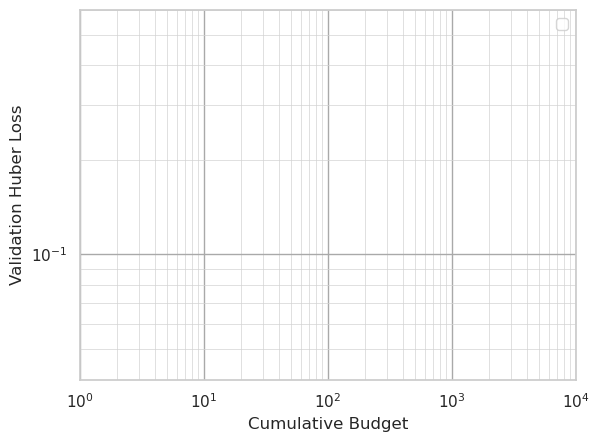

In [41]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

In [16]:
merged_df.iloc[0]

i                                           0
j                                           0
k                                           0
iteration                                 5.0
submitted                   1689354812.792473
started                      1689354812.79622
finished                    1689378869.487581
loss                                 0.069679
test_loss                            0.070294
test_gravity_loss                    0.013962
test_c_o_ratio_loss                  0.011255
test_metallicity_loss                0.042776
test_temperature_loss                0.002302
test_gravity_mae                     0.124527
test_c_o_ratio_mae                    0.11618
test_metallicity_mae                 0.226514
test_temperature_mae                 0.054799
val_loss                             0.069679
val_gravity_loss                     0.012268
val_c_o_ratio_loss                   0.011518
val_metallicity_loss                  0.04363
val_temperature_loss              

In [17]:
dict(merged_df.iloc[0, 35:-1])

{'Conv__MaxPooling1D': 2,
 'Conv__NumberBlocks': 3,
 'Conv__NumberLayers': 1,
 'Conv__filters': 4,
 'Conv__kernel_size': 8,
 'FC__NumberLayers': 2,
 'FC__dropout': 0.030964760379230474,
 'FC__units': 32,
 'FC__units_c_o_ratio': 32,
 'FC__units_gravity': 32,
 'FC__units_metallicity': 16,
 'FC__units_temperature': 64,
 'FC_in_Conv__NumberLayers': 2,
 'FC_in_Conv__dropout': 0.3355566291441,
 'FC_in_Conv__units': 256,
 'FC_out_dropout': 0.001798447771981873,
 'lr': 0.0003170001861017643}

In [18]:
merged_df.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__dropout',
       'FC__units', 'FC__units_c_o_ratio', 'FC__units_gravity',
       'FC__units_metallicity', 'FC__units_tempera

In [19]:
merged_df2 = merged_df [ merged_df['loss'] < 1 ]

In [20]:
merged_df2.shape

(13, 53)

In [21]:
merged_df2.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__dropout',
       'FC__units', 'FC__units_c_o_ratio', 'FC__units_gravity',
       'FC__units_metallicity', 'FC__units_tempera

In [22]:
data = merged_df[[
             'Conv__MaxPooling1D',
             # 'Conv__NumberBlocks',
             'Conv__NumberLayers',
             'Conv__filters',
             'Conv__kernel_size',
             'FC__NumberLayers',
             'FC__dropout',
             'FC__units',
             'FC__units_c_o_ratio',
             'FC__units_gravity',
             'FC__units_metallicity',
             'FC__units_temperature',
             # 'FC_in_Conv__dropout',
             # 'FC_in_Conv__units',
             'FC_out_dropout',
             'lr',
             'val_loss']
            ]

data.head()

,Conv__MaxPooling1D,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,FC__units,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_out_dropout,lr,val_loss
2,2,1,4,8,2,0.030965,32,32,32,16,64,0.001798,0.000317,0.069679
9,2,4,32,1,3,0.003676,64,8,256,128,16,0.002832,0.000234,0.073262
4,1,3,4,4,2,0.016539,256,256,256,128,64,0.032500,0.000020,0.073956
0,2,2,4,2,5,0.022051,8,128,256,128,16,0.003882,0.001389,0.080317
5,2,4,16,4,4,0.175749,32,128,8,128,32,0.006375,0.000500,0.083323


In [23]:
dict(merged_df2.sort_values('val_loss').iloc[0, 35:-1])

{'Conv__MaxPooling1D': 2,
 'Conv__NumberBlocks': 3,
 'Conv__NumberLayers': 1,
 'Conv__filters': 4,
 'Conv__kernel_size': 8,
 'FC__NumberLayers': 2,
 'FC__dropout': 0.030964760379230474,
 'FC__units': 32,
 'FC__units_c_o_ratio': 32,
 'FC__units_gravity': 32,
 'FC__units_metallicity': 16,
 'FC__units_temperature': 64,
 'FC_in_Conv__NumberLayers': 2,
 'FC_in_Conv__dropout': 0.3355566291441,
 'FC_in_Conv__units': 256,
 'FC_out_dropout': 0.001798447771981873,
 'lr': 0.0003170001861017643}

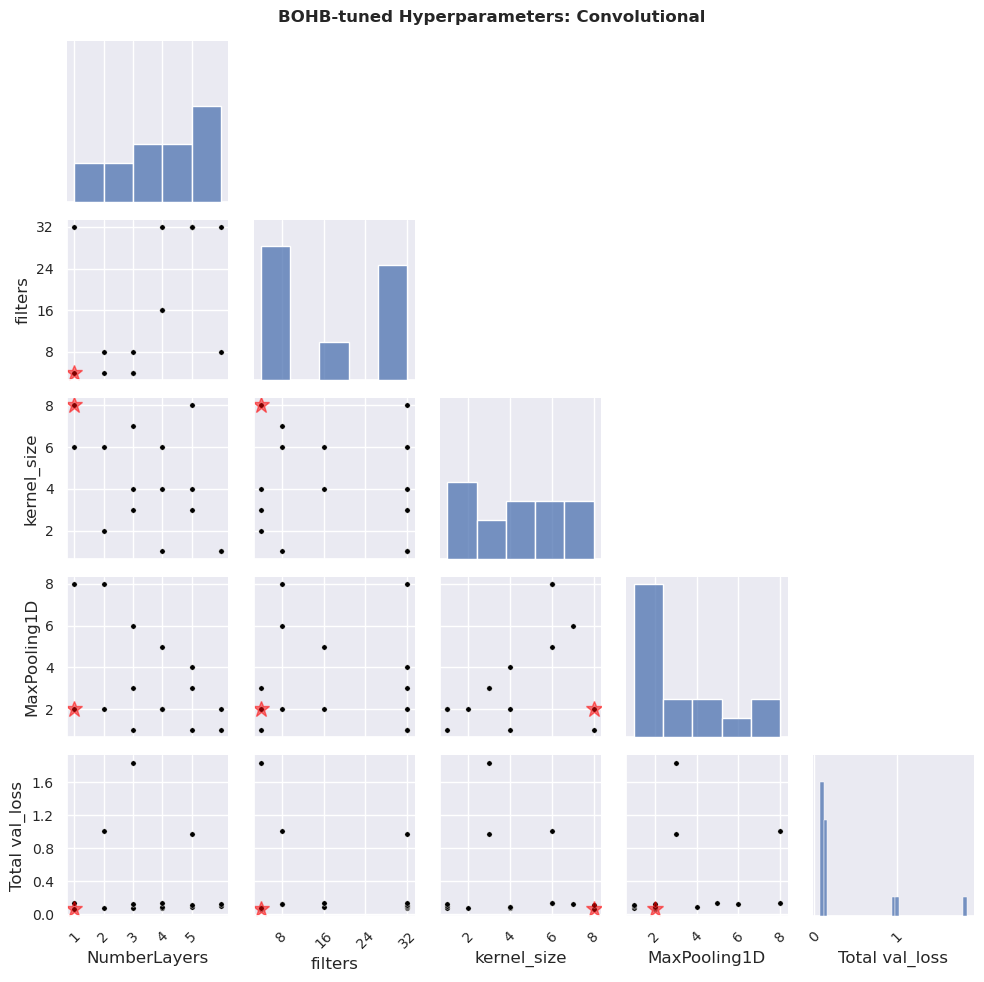

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, LogLocator

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
    # 'Conv__NumberBlocks',
                  'Conv__NumberLayers',
                  'Conv__filters',
                  'Conv__kernel_size',
                  'Conv__MaxPooling1D',
                  'val_loss']]

# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
labels = [
    # 'NumberBlocks',
          'NumberLayers',
          'filters',
          'kernel_size',
          'MaxPooling1D',
          'Total val_loss']

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=12)
    g.axes[i, 0].set_ylabel(label, fontsize=12)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in [ 'NumberLayers']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))
        # elif i == 0 and j==5:
        #     # Set logarithmic scale for the diagonal subplots
        #     g.axes[i, j].xaxis.set_major_locator(LogLocator(base=10))
        #     g.axes[i, j].xaxis.set_minor_locator(LogLocator(base=10, subs=[0.02,0.05,0.01, 0.5, 1.], numticks=10))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=12, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Convolutional", fontweight='bold', fontsize=12)

# Set the size of the figure to 10 inches by 10 inches
g.fig.set_size_inches(10, 10)

# plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


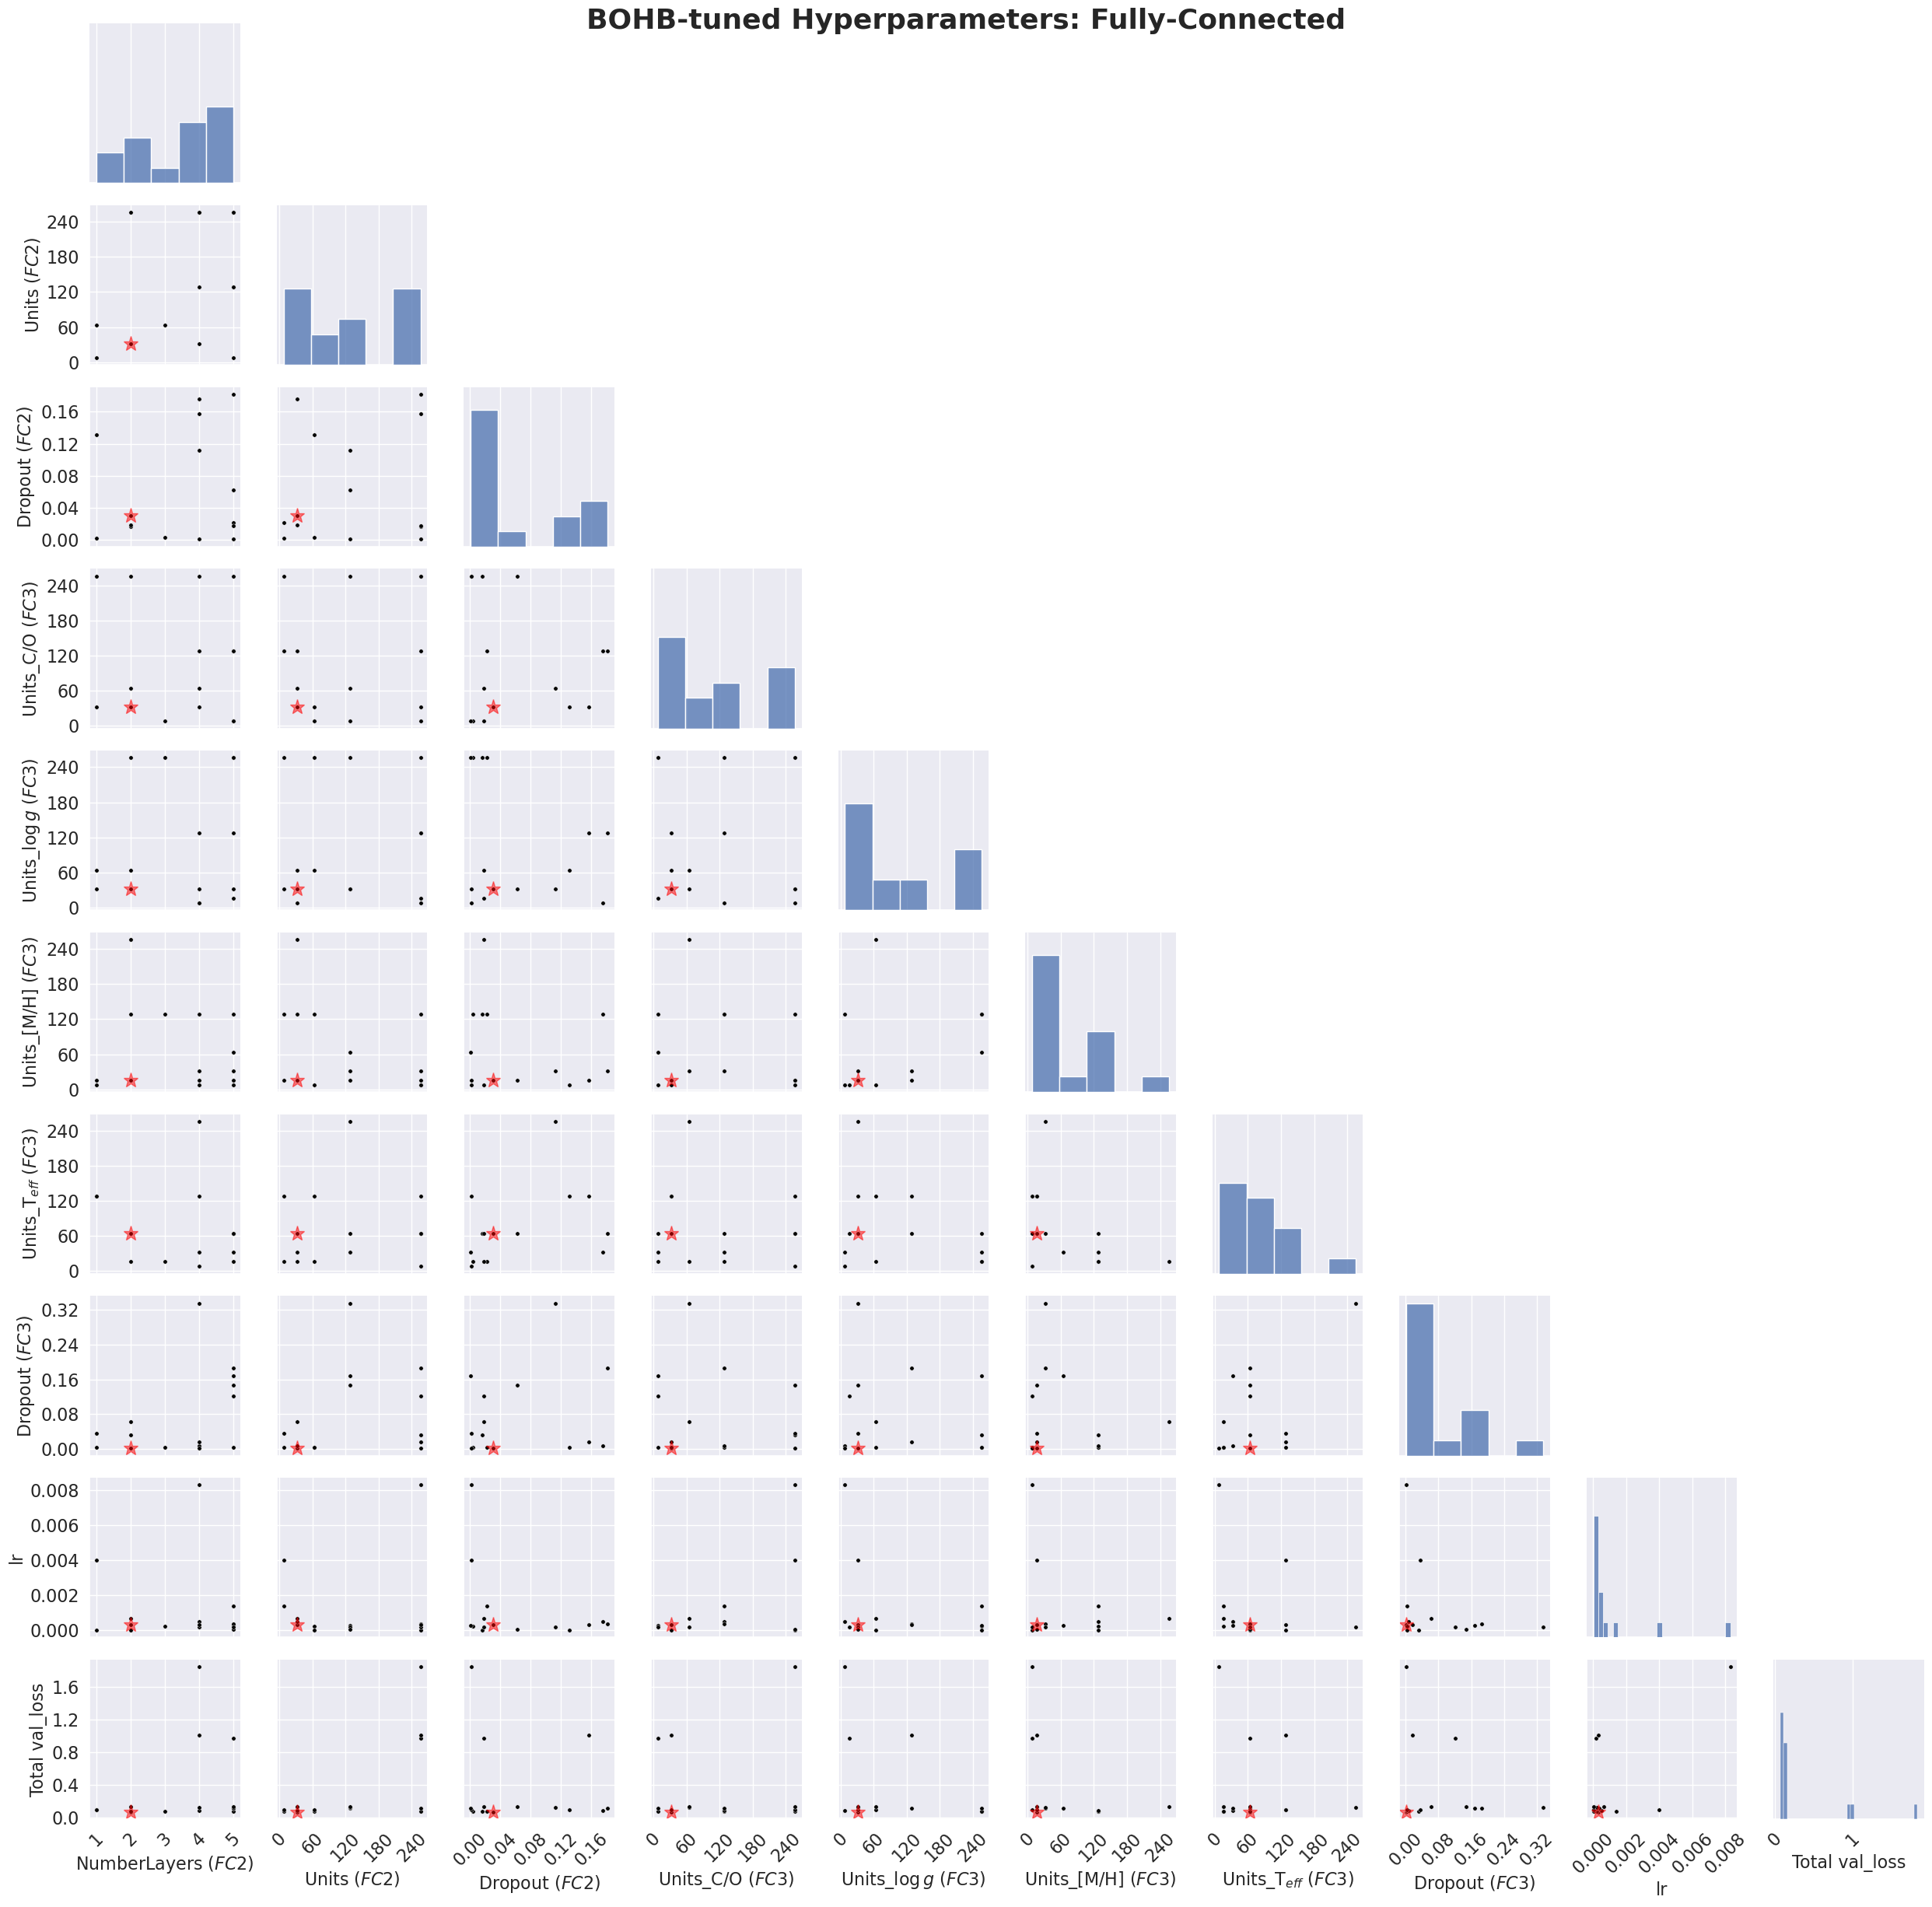

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator
from matplotlib.patches import Rectangle

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
                # 'FC_in_Conv__units',
                # 'FC_in_Conv__dropout',
                ###
                'FC__NumberLayers',
                'FC__units', 
                'FC__dropout', 
                ###
                'FC__units_c_o_ratio',
                'FC__units_gravity', 
                'FC__units_metallicity', 
                'FC__units_temperature',
                'FC_out_dropout',
                # # ###
                'lr',
                # ###
                'val_loss']]

# display(data)
# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
# Customize the x-axis tick labels for each subplot
labels = [
            # # ###
            # 'Units ($FC1$)',
            # 'Dropout ($FC1$)',
            ###
            'NumberLayers ($FC2$)',
            'Units ($FC2$)', 
            'Dropout ($FC2$)', 
            ###
            'Units_C/O ($FC3$)',
            'Units_$\log g$ ($FC3$)', 
            'Units_[M/H] ($FC3$)', 
            'Units_T$_{eff}$ ($FC3$)',
            'Dropout ($FC3$)',
            # # ###
            'lr',
            # ###
            'Total val_loss'
        ]

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=16)
    g.axes[i, 0].set_ylabel(label, fontsize=16)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in ['FC__units', 'FC__units_c_o_ratio']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator([4,8,16,32,64,128,256]))
                # g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=14, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Fully-Connected", fontweight='bold', fontsize=26)

# Set the size of the figure to 10 inches by 10 inches
# g.fig.set_size_inches(14, 14)
plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()
